In [105]:
import os
import csv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.io import imread
import imagehash

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from keras.preprocessing import image
from keras.src.applications.resnet import preprocess_input
from keras.src.applications.resnet import ResNet50
from keras.src.applications.resnet import decode_predictions
from keras.src.utils import load_img, img_to_array

from sklearn.metrics import classification_report



# Working with Images Lab
## Information retrieval, preprocessing, and feature extraction

### Problem 1. Some exploration (1 point)
How many types of cats are there? How many images do we have of each? What is a typical image size? Are there any outliers in size?

In [106]:
#Read the source folder with all different types of cats
cats_type = os.listdir('data/')

In [107]:
type(cats_type)

list

In [108]:
print(f"In the data we have {len(cats_type)} types of cats")

In the data we have 7 types of cats


In [109]:
for x in os.listdir('data/'):
    current_type = x
    print(f"{current_type}: {len(os.listdir(f'data/{current_type}'))} mages")

african-wildcat: 87 mages
blackfoot-cat: 78 mages
chinese-mountain-cat: 37 mages
domestic-cat: 59 mages
european-wildcat: 57 mages
jungle-cat: 80 mages
sand-cat: 67 mages


In [110]:
img_size_data = []
def add_img(img):
    img_size_data.append(img)
    
    return img

In [111]:
def return_image_shape(type_of_cats):
    cat_images = os.listdir(f'data/{type_of_cats}')
    
    for image_name in cat_images:
        image_path = os.path.join(f'data/{type_of_cats}', image_name)
        with Image.open(image_path) as img:
            img_array = np.array(img)
            print(f"{image_name}: {img_array.shape}")
            add_img(img_array.shape)
    
    return type_of_cats

In [112]:
cats = os.listdir('data')
for x in cats:
    return_image_shape(x)

af (1).jpg: (190, 265, 3)
af (10).jpg: (184, 274, 3)
af (11).jpg: (183, 275, 3)
af (12).jpg: (192, 263, 3)
af (13).jpg: (219, 230, 3)
af (14).jpg: (275, 183, 3)
af (15).jpg: (183, 275, 3)
af (16).jpg: (209, 241, 3)
af (17).jpg: (168, 300, 3)
af (18).jpg: (183, 275, 3)
af (19).jpg: (195, 258, 3)
af (2).jpg: (194, 259, 3)
af (20).jpg: (258, 195, 3)
af (21).jpg: (124, 220, 3)
af (22).jpg: (225, 225, 3)
af (23).jpg: (183, 275, 3)
af (24).jpg: (192, 262, 3)
af (25).jpg: (264, 191, 3)
af (26).jpg: (258, 195, 3)
af (27).jpg: (183, 275, 3)
af (28).jpg: (183, 275, 3)
af (29).jpg: (191, 264, 3)
af (3).jpg: (225, 225, 3)
af (30).jpg: (194, 259, 3)
af (31).jpg: (201, 250, 3)
af (33).jpg: (259, 195, 3)
af (34).jpg: (225, 225, 3)
af (35).jpg: (183, 275, 3)
af (36).jpg: (190, 265, 3)
af (38).jpg: (267, 189, 3)
af (39).jpg: (190, 265, 3)
af (4).jpg: (185, 272, 3)
af (40).jpg: (192, 262, 3)
af (41).jpg: (183, 275, 3)
af (42).jpg: (183, 275, 3)
af (43).jpg: (177, 285, 3)
af (44).jpg: (183, 275, 3)
af (4

In [113]:
img_size_data

[(190, 265, 3),
 (184, 274, 3),
 (183, 275, 3),
 (192, 263, 3),
 (219, 230, 3),
 (275, 183, 3),
 (183, 275, 3),
 (209, 241, 3),
 (168, 300, 3),
 (183, 275, 3),
 (195, 258, 3),
 (194, 259, 3),
 (258, 195, 3),
 (124, 220, 3),
 (225, 225, 3),
 (183, 275, 3),
 (192, 262, 3),
 (264, 191, 3),
 (258, 195, 3),
 (183, 275, 3),
 (183, 275, 3),
 (191, 264, 3),
 (225, 225, 3),
 (194, 259, 3),
 (201, 250, 3),
 (259, 195, 3),
 (225, 225, 3),
 (183, 275, 3),
 (190, 265, 3),
 (267, 189, 3),
 (190, 265, 3),
 (185, 272, 3),
 (192, 262, 3),
 (183, 275, 3),
 (183, 275, 3),
 (177, 285, 3),
 (183, 275, 3),
 (264, 191, 3),
 (168, 300, 3),
 (219, 230, 3),
 (168, 300, 3),
 (161, 313, 3),
 (183, 275, 3),
 (192, 262, 3),
 (275, 183, 3),
 (252, 200, 3),
 (168, 300, 3),
 (183, 275, 3),
 (183, 275, 3),
 (178, 283, 3),
 (225, 225, 3),
 (183, 275, 3),
 (185, 273, 3),
 (194, 259, 3),
 (183, 276, 3),
 (225, 225, 3),
 (154, 327, 3),
 (194, 259, 3),
 (183, 275, 3),
 (183, 275, 3),
 (192, 262, 3),
 (183, 275, 3),
 (182, 2

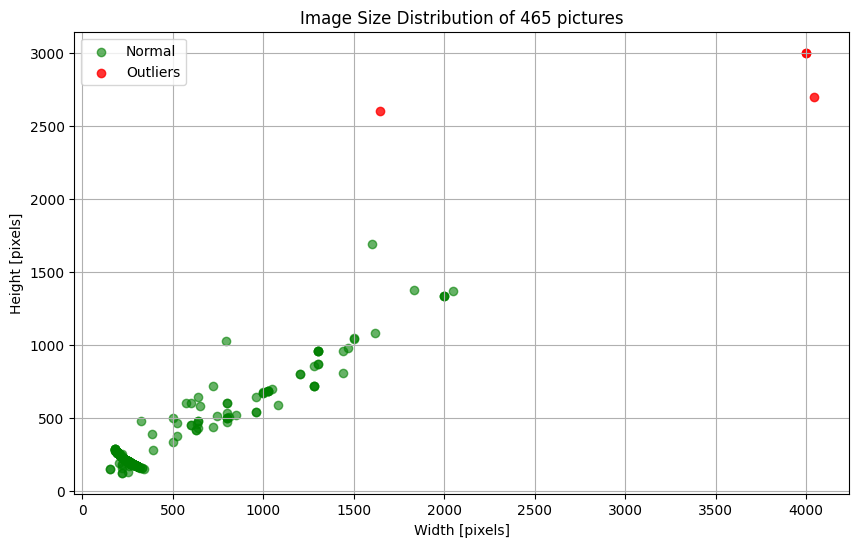

In [114]:
heights = [h[0] for h in img_size_data]
widths = [w[1] for w in img_size_data]

heights = np.array(heights)
widths = np.array(widths)


outliers = (heights > 2500) | (widths > 2100)

plt.figure(figsize=(10, 6))
plt.scatter(widths[~outliers], heights[~outliers], color='green', alpha=0.6, label='Normal')
plt.scatter(widths[outliers], heights[outliers], color='red', alpha=0.8, label='Outliers')
plt.xlabel('Width [pixels]')
plt.ylabel('Height [pixels]')
plt.title(f'Image Size Distribution of {len(heights)} pictures')
plt.legend()
plt.grid(True)
plt.show()

In [115]:
typical_height = int(np.median(heights))
typical_width = int(np.median(widths))

print(f"Typical image size is with height: {typical_height}  and width: {typical_width} pixels")

Typical image size is with height: 194  and width: 275 pixels


### Problem 2. Duplicat(e)s (1 point)
Find a way to filter out (remove) identical images. I would recommend using file hashes, but there are many approaches. Keep in mind that during file saving, recompression, etc., a lot of artifacts can change the file content (bytes), but not visually.

In [116]:
folder_path = 'data'
hashes = {}
duplicates = []

for root, dirs, files in os.walk(folder_path):
    for filename in files:
        file_path = os.path.join(root, filename)

        try:
            with Image.open(file_path) as img:
                img_hash = imagehash.phash(img)

                if img_hash in hashes:
                    duplicates.append(file_path)
                else:
                    hashes[img_hash] = file_path
        except Exception as e:
            print(f"Error with {file_path}: {e}")

for dup in duplicates:
    try:
        os.remove(dup)
    except Exception as e:
        print(f"Could not remove {dup}: {e}")

len(duplicates)    

0

### Problem 3. Loading a model (2 points)
Find a suitable, trained convolutional neural network classifier. I recommend `ResNet50` as it's small enough to run well on any machine and powerful enough to make reasonable predictions. Most ready-made classifiers have been trained for 1000 classes.

You'll need to install libraries and possibly tinker with configurations for this task. When you're done, display the total number of layers and the total number of parameters. For ResNet50, you should expect around 50 layers and 25M parameters.

In [117]:
model = tf.keras.applications.ResNet50(weights='imagenet')
print(f"Total layers: {len([layer for layer in model.layers if len(layer.weights) > 0])}")
print(f"Total parameters: {model.count_params():,}")

Total layers: 107
Total parameters: 25,636,712


### Problem 4. Prepare the images (1 point)
You'll need to prepare the images for passing to the model. To do so, they have to be resized to the same dimensions. Most available models have a specific requirement for sizes. You may need to do additional preprocessing, depending on the model requirements. These requirements should be easily available in the model documentation.

In [118]:
with open("predictions.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Prediction 1", "Prob 1", "Prediction 2", "Prob 2", "Prediction 3", "Prob 3"])
    
    model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

    for root, dirs, files in os.walk('data'):
        for file_name in files:
            if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(root, file_name)
    
                    
                img = load_img(file_path, target_size=(224, 224))
                x = img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
    
                    
                pred = model.predict(x)
                decoded = decode_predictions(pred, top=3)[0]
    
                    
                row = [file_name]
                for _, label, prob in decoded:
                    row.extend([label, f"{prob*100:.2f}%"])
                writer.writerow(row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━

### Problem 5. Load the images efficiently (1 point)
Now that you've seen how to prepare the images for passing to the model... find a way to do it efficiently. Instead of loading the entire dataset in the RAM, read the images in batches (e.g. 4 images at a time). The goal is to read these, preprocess them, maybe save the preprocessed results in RAM.

If you've already done this in one of the previous problems, just skip this one. You'll get your point for it.

\* Even better, save the preprocessed image arrays (they will not be valid .jpg file) as separate files, so you can load them "lazily" in the following steps. This is a very common optimization to work with large datasets.

In [119]:
data_path = 'data/'
output_dir = 'batches'

os.makedirs(output_dir, exist_ok=True)

image_path = []
for root, _, files in os.walk(data_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path.append(os.path.join(root, file))

BATCH_SIZE = 4

for i in range(0, len(image_path), BATCH_SIZE):
    batch_path = image_path[i:i + BATCH_SIZE]
    batch_img = []

    for path in batch_path:
        img = load_img(path, target_size=(224, 224))
        x = img_to_array(img)
        batch_img.append(x)

    batch_array = np.array(batch_img)
    batch_array = preprocess_input(batch_array)

    batch_file = os.path.join(output_dir, f"batch_{i//BATCH_SIZE:04d}.npy")
    np.save(batch_file, batch_array)
    print(f"Saved {batch_file}")

Saved batches\batch_0000.npy
Saved batches\batch_0001.npy
Saved batches\batch_0002.npy
Saved batches\batch_0003.npy
Saved batches\batch_0004.npy
Saved batches\batch_0005.npy
Saved batches\batch_0006.npy
Saved batches\batch_0007.npy
Saved batches\batch_0008.npy
Saved batches\batch_0009.npy
Saved batches\batch_0010.npy
Saved batches\batch_0011.npy
Saved batches\batch_0012.npy
Saved batches\batch_0013.npy
Saved batches\batch_0014.npy
Saved batches\batch_0015.npy
Saved batches\batch_0016.npy
Saved batches\batch_0017.npy
Saved batches\batch_0018.npy
Saved batches\batch_0019.npy
Saved batches\batch_0020.npy
Saved batches\batch_0021.npy
Saved batches\batch_0022.npy
Saved batches\batch_0023.npy
Saved batches\batch_0024.npy
Saved batches\batch_0025.npy
Saved batches\batch_0026.npy
Saved batches\batch_0027.npy
Saved batches\batch_0028.npy
Saved batches\batch_0029.npy
Saved batches\batch_0030.npy
Saved batches\batch_0031.npy
Saved batches\batch_0032.npy
Saved batches\batch_0033.npy
Saved batches\

In [120]:
files = os.listdir('batches')
file_path = f'batches/{files[0]}'
batch_data = np.load(file_path) 

In [121]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

pred = model.predict(batch_data)

for i, pred in enumerate(pred):
    decoded = decode_predictions(np.expand_dims(pred, axis=0), top=3)[0]
    print(f"Image {i+1}:")
    for rank, (_, label, prob) in enumerate(decoded):
        print(f"{rank+1}: {label} ({prob*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image 1:
1: lynx (74.67%)
2: lion (13.32%)
3: leopard (5.34%)
Image 2:
1: tabby (49.05%)
2: Egyptian_cat (33.04%)
3: tiger_cat (11.83%)
Image 3:
1: lynx (51.60%)
2: lion (19.54%)
3: cougar (15.21%)
Image 4:
1: lynx (81.33%)
2: Egyptian_cat (5.60%)
3: tiger_cat (4.56%)


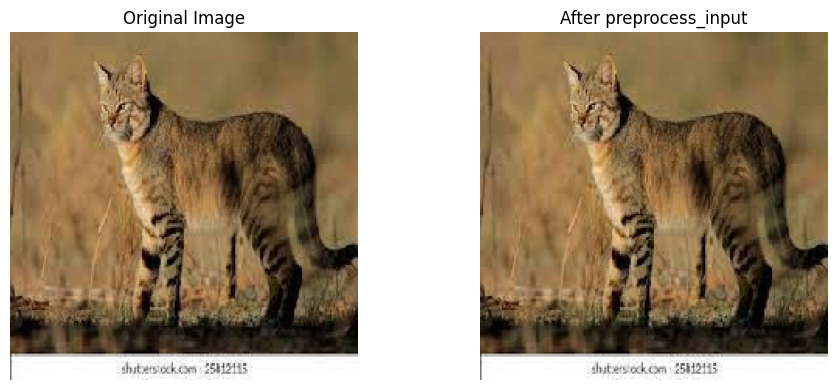

In [122]:
img_path = 'data/african-wildcat/af (1).jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)

preprocessed = preprocess_input(np.copy(img_array))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(img_array.astype('uint8'))
axs[0].set_title("Original Image")
axs[0].axis('off')

image_to_show = preprocessed + [103.939, 116.779, 123.68]
image_to_show = np.clip(image_to_show, 0, 255)
image_to_show = image_to_show[..., ::-1]

axs[1].imshow(image_to_show.astype('uint8'))
axs[1].set_title("After preprocess_input")
axs[1].axis('off')

plt.tight_layout()
plt.show()

### Problem 6. Predictions (1 point)
Finally, you're ready to get into the meat of the problem. Obtain predictions from your model and evaluate them. This will likely involve manual work to decide how the returned classes relate to the original ones.

Create a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) to evaluate the classification.

In [123]:
folder = 'data/african-wildcat'
files = os.listdir(folder)
len(files)

87

In [124]:
test_model = tf.keras.applications.ResNet50(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

for fname in files:
    path = os.path.join(folder, fname)

    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    pred = test_model.predict(img_array)
    decoded = decode_predictions(pred, top=3)[0]

    print(f"\nPredictions for {fname}:")
    for i, (_, label, prob) in enumerate(decoded):
        print(f"{i+1}: {label} ({prob*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Predictions for af (1).jpg:
1: lynx (74.67%)
2: lion (13.32%)
3: leopard (5.34%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

Predictions for af (10).jpg:
1: tabby (49.05%)
2: Egyptian_cat (33.04%)
3: tiger_cat (11.83%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Predictions for af (11).jpg:
1: lynx (51.60%)
2: lion (19.54%)
3: cougar (15.21%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

Predictions for af (12).jpg:
1: lynx (81.33%)
2: Egyptian_cat (5.60%)
3: tiger_cat (4.56%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Predictions for af (13).jpg:
1: Egyptian_cat (40.79%)
2: lynx (21.28%)
3: tabby (8.41%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

Predictions for af (14).jpg:
1: grey_fox (59.37%)
2: Egyptian_cat (8.51%)
3: kit_fox (7.23%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Predictions for af (15).jpg:
1: grey_fox (85.40%)
2: kit_fox (7.31%)
3: red_fox (5.09%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

Predictions for af (16).jpg:
1: coyote (29.55%)
2: timber_wolf (12.71%)


In [125]:
labels = [decode_predictions(np.eye(1, 1000, i))[0][0][1] for i in range(1000)]
for i, label in enumerate(labels):
    if label.lower().__contains__('cat'):
        print(f"{i}: {label}")

143: oystercatcher
282: tiger_cat
283: Persian_cat
284: Siamese_cat
285: Egyptian_cat
358: polecat
383: Madagascar_cat
484: catamaran


In [126]:
tabby_1 = 'data/domestic-cat/dc (14).jpg'
tabby_2 = 'data/domestic-cat/dc (15).jpg'
tabby_3 = 'data/domestic-cat/dc (34).jpg'
tabby_4 = 'data/domestic-cat/dc (34).jpg'
tabby_5 = 'data/domestic-cat/dc (43).jpg'

tiger_cat_1 = 'data/domestic-cat/dc (1).jpg'
tiger_cat_2 = 'data/domestic-cat/dc (31).jpg'
tiger_cat_3 = 'data/domestic-cat/dc (40).jpg'
tiger_cat_4 = 'data/domestic-cat/dc (51).jpg'
tiger_cat_5 = 'data/domestic-cat/dc (54).jpg'

egyptian_cat_1 = 'data/domestic-cat/dc (16).jpg'
egyptian_cat_2 = 'data/domestic-cat/dc (18).jpg'
egyptian_cat_3 = 'data/domestic-cat/dc (19).jpg'
egyptian_cat_4 = 'data/domestic-cat/dc (23).jpg'
egyptian_cat_5 = 'data/domestic-cat/dc (28).jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


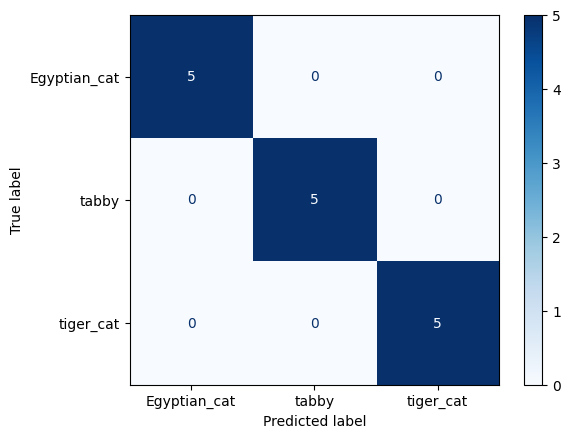

In [127]:
image_paths = [
    tabby_1, tabby_2, tabby_3, tabby_4, tabby_5,
    tiger_cat_1, tiger_cat_2, tiger_cat_3, tiger_cat_4, tiger_cat_5,
    egyptian_cat_1, egyptian_cat_2, egyptian_cat_3, egyptian_cat_4, egyptian_cat_5
]

y_true_labels = (
    ['tabby'] * 5 +
    ['tiger_cat'] * 5 +
    ['Egyptian_cat'] * 5
)

y_pred_labels = []

for path in image_paths:
    img = image.load_img(path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    pred = test_model.predict(img_array)
    top_label = decode_predictions(pred, top=1)[0][0][1]
    y_pred_labels.append(top_label)
    
all_labels = np.unique(y_true_labels + y_pred_labels)

cm = confusion_matrix(y_true_labels, y_pred_labels, labels=all_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap='Blues')

In [129]:

data_dir = 'data/'

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(train_gen, validation_data=val_gen, epochs=5)


img_path = 'data/domestic-cat/dc (1).jpg'
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
predicted_class = list(train_gen.class_indices.keys())[np.argmax(pred)]
print("Predicted class:", predicted_class)

Found 375 images belonging to 7 classes.
Found 90 images belonging to 7 classes.
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.2388 - loss: 2.0049 - val_accuracy: 0.4778 - val_loss: 1.5443
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - accuracy: 0.5044 - loss: 1.3879 - val_accuracy: 0.6111 - val_loss: 1.2433
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.6779 - loss: 1.0562 - val_accuracy: 0.6778 - val_loss: 1.0456
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8124 - loss: 0.8364 - val_accuracy: 0.7222 - val_loss: 0.9123
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8668 - loss: 0.6638 - val_accuracy: 0.7556 - val_loss: 0.8074
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
Predicted class: jungle-cat


In [141]:
folder = 'data/african-wildcat/'
files = os.listdir(folder)

for fname in files:
    if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(folder, fname)

        img = load_img(path, target_size=(224, 224))
        x = img_to_array(img)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)

        pred = model.predict(x)[0]
        class_indices = train_gen.class_indices
        class_names = list(class_indices.keys())

        print(f"\nPredictions for {fname}:")
        for i, prob in enumerate(pred):
            print(f"{class_names[i]}: {prob*100:.2f}%")

        predicted_class = class_names[np.argmax(pred)]
        print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Predictions for af (1).jpg:
african-wildcat: 88.07%
blackfoot-cat: 1.06%
chinese-mountain-cat: 0.83%
domestic-cat: 1.13%
european-wildcat: 3.67%
jungle-cat: 2.24%
sand-cat: 2.99%
Predicted class: african-wildcat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Predictions for af (10).jpg:
african-wildcat: 17.78%
blackfoot-cat: 32.96%
chinese-mountain-cat: 4.33%
domestic-cat: 34.54%
european-wildcat: 5.18%
jungle-cat: 1.87%
sand-cat: 3.35%
Predicted class: domestic-cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

Predictions for af (11).jpg:
african-wildcat: 82.66%
blackfoot-cat: 0.84%
chinese-mountain-cat: 0.98%
domestic-cat: 0.94%
european-wildcat: 3.18%
jungle-cat: 5.14%
sand-cat: 6.26%
Predicted class: african-wildcat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

Predictions for af (12).jpg:
african-wildcat: 47.05%
blackfoot-cat: 5.69%
chinese-mountain-cat: 4.14%
domestic-cat: 11.17%
european-wildcat: 26.78%
jungle-cat: 3.37%
sand-cat: 1.81%
Predicted class: african-

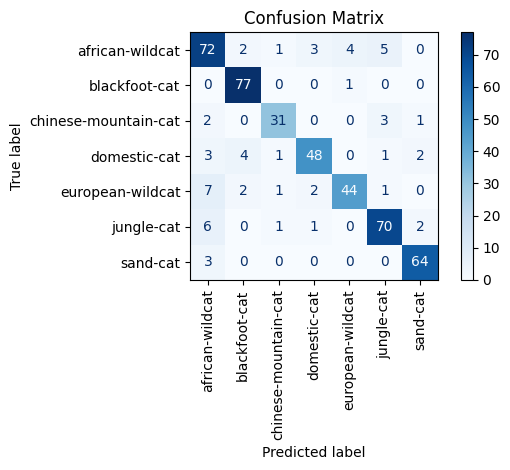


Classification Report:

                      precision    recall  f1-score   support

     african-wildcat       0.77      0.83      0.80        87
       blackfoot-cat       0.91      0.99      0.94        78
chinese-mountain-cat       0.89      0.84      0.86        37
        domestic-cat       0.89      0.81      0.85        59
    european-wildcat       0.90      0.77      0.83        57
          jungle-cat       0.88      0.88      0.88        80
            sand-cat       0.93      0.96      0.94        67

            accuracy                           0.87       465
           macro avg       0.88      0.87      0.87       465
        weighted avg       0.87      0.87      0.87       465



In [140]:
data_dir = 'data/'
class_names = list(train_gen.class_indices.keys())

y_true_labels = []
y_pred_labels = []


for class_name in class_names:
    folder = os.path.join(data_dir, class_name)
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, fname)

            img = load_img(path, target_size=(224, 224))
            x = img_to_array(img)
            x = preprocess_input(x)
            x = np.expand_dims(x, axis=0)

            pred = model.predict(x, verbose=0)[0]
            predicted_class = class_names[np.argmax(pred)]

            y_true_labels.append(class_name)
            y_pred_labels.append(predicted_class)


cm = confusion_matrix(y_true_labels, y_pred_labels, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels))

### Problem 7. Grayscale (1 point)
Converting the images to grayscale should affect the classification negatively, as we lose some of the color information.

Find a way to preprocess the images to grayscale (using what you already have in Problem 4 and 5), pass them to the model, and compare the classification results to the previous ones.

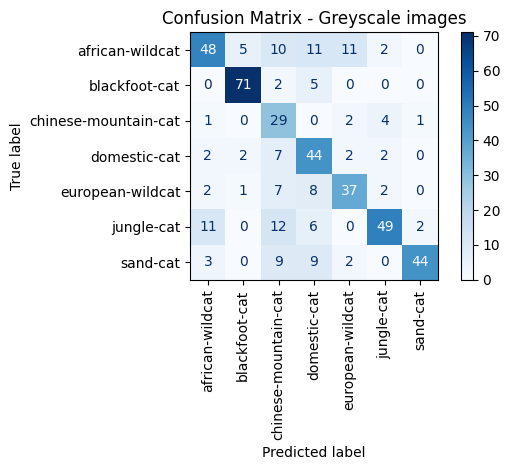


Classification Report:

                      precision    recall  f1-score   support

     african-wildcat       0.72      0.55      0.62        87
       blackfoot-cat       0.90      0.91      0.90        78
chinese-mountain-cat       0.38      0.78      0.51        37
        domestic-cat       0.53      0.75      0.62        59
    european-wildcat       0.69      0.65      0.67        57
          jungle-cat       0.83      0.61      0.71        80
            sand-cat       0.94      0.66      0.77        67

            accuracy                           0.69       465
           macro avg       0.71      0.70      0.69       465
        weighted avg       0.74      0.69      0.70       465



In [145]:
data_dir = 'data/'
class_names = list(train_gen.class_indices.keys())

y_true_labels = []
y_pred_labels = []


for class_name in class_names:
    folder = os.path.join(data_dir, class_name)
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, fname)

            img = load_img(path, color_mode='grayscale', target_size=(224, 224))
            x = img_to_array(img)
            x = np.repeat(x, 3, axis=2)
            
            x = preprocess_input(x)
            x = np.expand_dims(x, axis=0)

            pred = model.predict(x, verbose=0)[0]
            predicted_class = class_names[np.argmax(pred)]

            y_true_labels.append(class_name)
            y_pred_labels.append(predicted_class)


cm = confusion_matrix(y_true_labels, y_pred_labels, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title("Confusion Matrix - Greyscale images")
plt.tight_layout()
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_true_labels, y_pred_labels))

### Problem 8. Deep image features (1 point)
Find a way to extract one-dimensional vectors (features) for each (non-grayscale) image, using your model. This is typically done by "short-circuiting" the model output to be an intermediate layer, while keeping the input the same. 

In case the outputs (also called feature maps) have different shapes, you can flatten them in different ways. Try to not create huge vectors; the goal is to have a relatively short sequence of numbers which describes each image.

You may find a tutorial like [this](https://towardsdatascience.com/exploring-feature-extraction-with-cnns-345125cefc9a) pretty useful but note your implementation will depend on what model (and framework) you've decided to use.

It's a good idea to save these as one or more files, so you'll spare yourself a ton of preprocessing.

In [147]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

data_dir = 'data/'
image_paths = []
labels = []

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for fname in os.listdir(class_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_paths.append(os.path.join(class_path, fname))
                labels.append(class_name)

features = []
for path in image_paths:
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)

    vector = feature_extractor.predict(x, verbose=0)[0]
    features.append(vector)
    
features = np.array(features)
labels = np.array(labels)

np.save('features.npy', features)
np.save('labels.npy', labels)

In [149]:
features = np.load('features.npy')
print(features.shape)
print(features[0])

(465, 2048)
[0.07892706 0.609582   0.00603245 ... 0.51192427 0.         0.03322366]


### Problem 9. Putting deep image features to use (1 points)
Try to find similar images, using a similarity metric on the features you got in the previous problem. Two good metrics are `mean squared error` and `cosine similarity`. How do they work? Can you spot images that look too similar? Can you explain why?

\* If we were to take Fourier features (in a similar manner, these should be a vector of about the same length), how do they compare to the deep features; i.e., which features are better to "catch" similar images?

In [152]:
from sklearn.metrics.pairwise import cosine_similarity

features = np.load('features.npy')
labels = np.load('labels.npy')

similarities = cosine_similarity(features)

for i in range(len(similarities)):
    sorted_indices = similarities[i].argsort()[::-1]
    top_match = sorted_indices[1]
    print(f"Image {i} (Label: {labels[i]}) is most similar to Image {top_match} (Label: {labels[top_match]})")

Image 0 (Label: african-wildcat) is most similar to Image 2 (Label: african-wildcat)
Image 1 (Label: african-wildcat) is most similar to Image 203 (Label: domestic-cat)
Image 2 (Label: african-wildcat) is most similar to Image 0 (Label: african-wildcat)
Image 3 (Label: african-wildcat) is most similar to Image 70 (Label: african-wildcat)
Image 4 (Label: african-wildcat) is most similar to Image 39 (Label: african-wildcat)
Image 5 (Label: african-wildcat) is most similar to Image 348 (Label: jungle-cat)
Image 6 (Label: african-wildcat) is most similar to Image 52 (Label: african-wildcat)
Image 7 (Label: african-wildcat) is most similar to Image 179 (Label: chinese-mountain-cat)
Image 8 (Label: african-wildcat) is most similar to Image 440 (Label: sand-cat)
Image 9 (Label: african-wildcat) is most similar to Image 3 (Label: african-wildcat)
Image 10 (Label: african-wildcat) is most similar to Image 451 (Label: sand-cat)
Image 11 (Label: african-wildcat) is most similar to Image 102 (Labe

### * Problem 10. Explore, predict, and evaluate further
You can do a ton of things here, at your desire. For example, how does masking different areas of the image affect classification - a method known as **saliency map** ([info](https://en.wikipedia.org/wiki/Saliency_map))? Can we detect objects? Can we significantly reduce the number of features (keeping the quality) that we get? Can we reliably train a model to predict our own classes? We'll look into these in detail in the future.

### Saliency Map

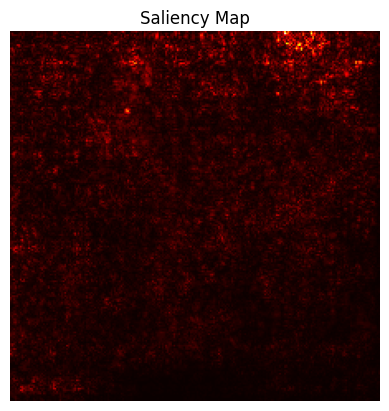

In [155]:
img = load_img('data/african-wildcat/af (1).jpg', target_size=(224, 224))

x = img_to_array(img)
x = preprocess_input(x)
x = tf.convert_to_tensor(np.expand_dims(x, axis=0))

with tf.GradientTape() as tape:
    tape.watch(x)
    pred = model(x)
    top_class = tf.argmax(pred[0])
    loss = pred[0][top_class]

grads = tape.gradient(loss, x)[0]
saliency = tf.reduce_max(tf.abs(grads), axis=-1).numpy()

plt.imshow(saliency, cmap='hot')
plt.axis('off')
plt.title('Saliency Map')
plt.show()

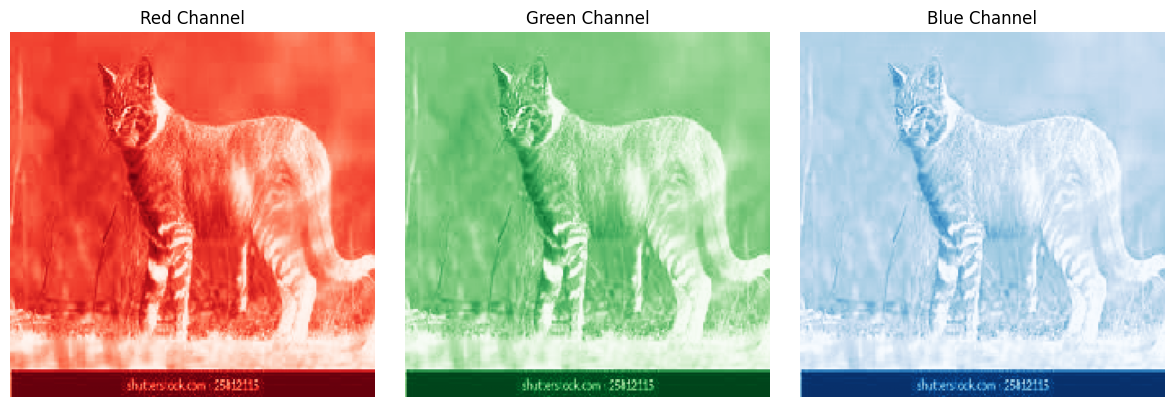

In [158]:
img = load_img('data/african-wildcat/af (1).jpg', target_size=(224, 224))
img_array = img_to_array(img)

red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()